In [1]:
!pip install neo4j pandas matplotlib networkx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.3/312.3 kB 4.8 MB/s eta 0:00:00


In [2]:
from neo4j import GraphDatabase

# Neo4j Aura connection details
NEO4J_URI = "neo4j+s://d657ebad.databases.neo4j.io"
NEO4J_USERNAME = "neo4j"
NEO4J_PASSWORD = "MgHLmiEY_5WPq9PG5vplTKkVccd2p_V76I3hj38IVbk"

# Initialize the Neo4j driver
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD))

def test_connection():
    with driver.session() as session:
        result = session.run("RETURN 'Connection successful' AS message")
        return result.single()["message"]

print(test_connection())

Connection successful


In [34]:
import networkx as nx
import matplotlib.pyplot as plt


# Create a directed graph
G = nx.DiGraph()

# Query for DeceaseCluster = "DC7"
def fetch_graph_data(tx):
    result = tx.run("""
        MATCH (dcc:DeceaseCluster {DecClusterId: "DC3"})
              <-[:molctodecc]-(mc:MoleculeCluster)
              <-[:BELONGS_TO]-(m:Molecule)-[:moleculetotarget]->(t:Target)
        RETURN dcc.DecClusterName AS decease_cluster, mc.molClusterName AS molecule_cluster,
               m.moleculeName AS molecule, t.targetName AS target
    """)
    return result.data()

# Fetch data and build the graph
with driver.session() as session:
    graph_data = session.execute_read(fetch_graph_data)

for record in graph_data:
    # Add nodes
    G.add_node(record['decease_cluster'], type='DeceaseCluster')
    G.add_node(record['molecule_cluster'], type='MoleculeCluster')
    G.add_node(record['molecule'], type='Molecule')
    G.add_node(record['target'], type='Target')

    # Add edges
    G.add_edge(record['molecule_cluster'], record['decease_cluster'], label='molctodecc')
    G.add_edge(record['molecule'], record['molecule_cluster'], label='BELONGS_TO')
    G.add_edge(record['molecule'], record['target'], label='moleculetotarget')

print("Graph data for DeceaseCluster 'DC7' loaded into NetworkX.")

Graph data for DeceaseCluster 'DC7' loaded into NetworkX.


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['lightred', 'lightcoral', 'lightblue', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightblue', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightblue', 'lightgreen', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightblue', 'lightblue', 'lightgreen', 'lightblue', 'lightcoral', 'lightblue', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightblue', 'lightgreen', 'lightgreen', 'lightblue', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightblue', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightblue', 'lightgreen', 'lightgreen', 'lightgreen', 'lightblue', 'lightgreen', 'lightblue', 'lightgreen', 'lightblue', 'lightblue', 'lightblue', 'lightgreen', 'lightblue', 'lightblue', 'lightgreen', 'lightgreen', 'lightblue', 'lightgreen', 'lightgreen', 'lightblue']

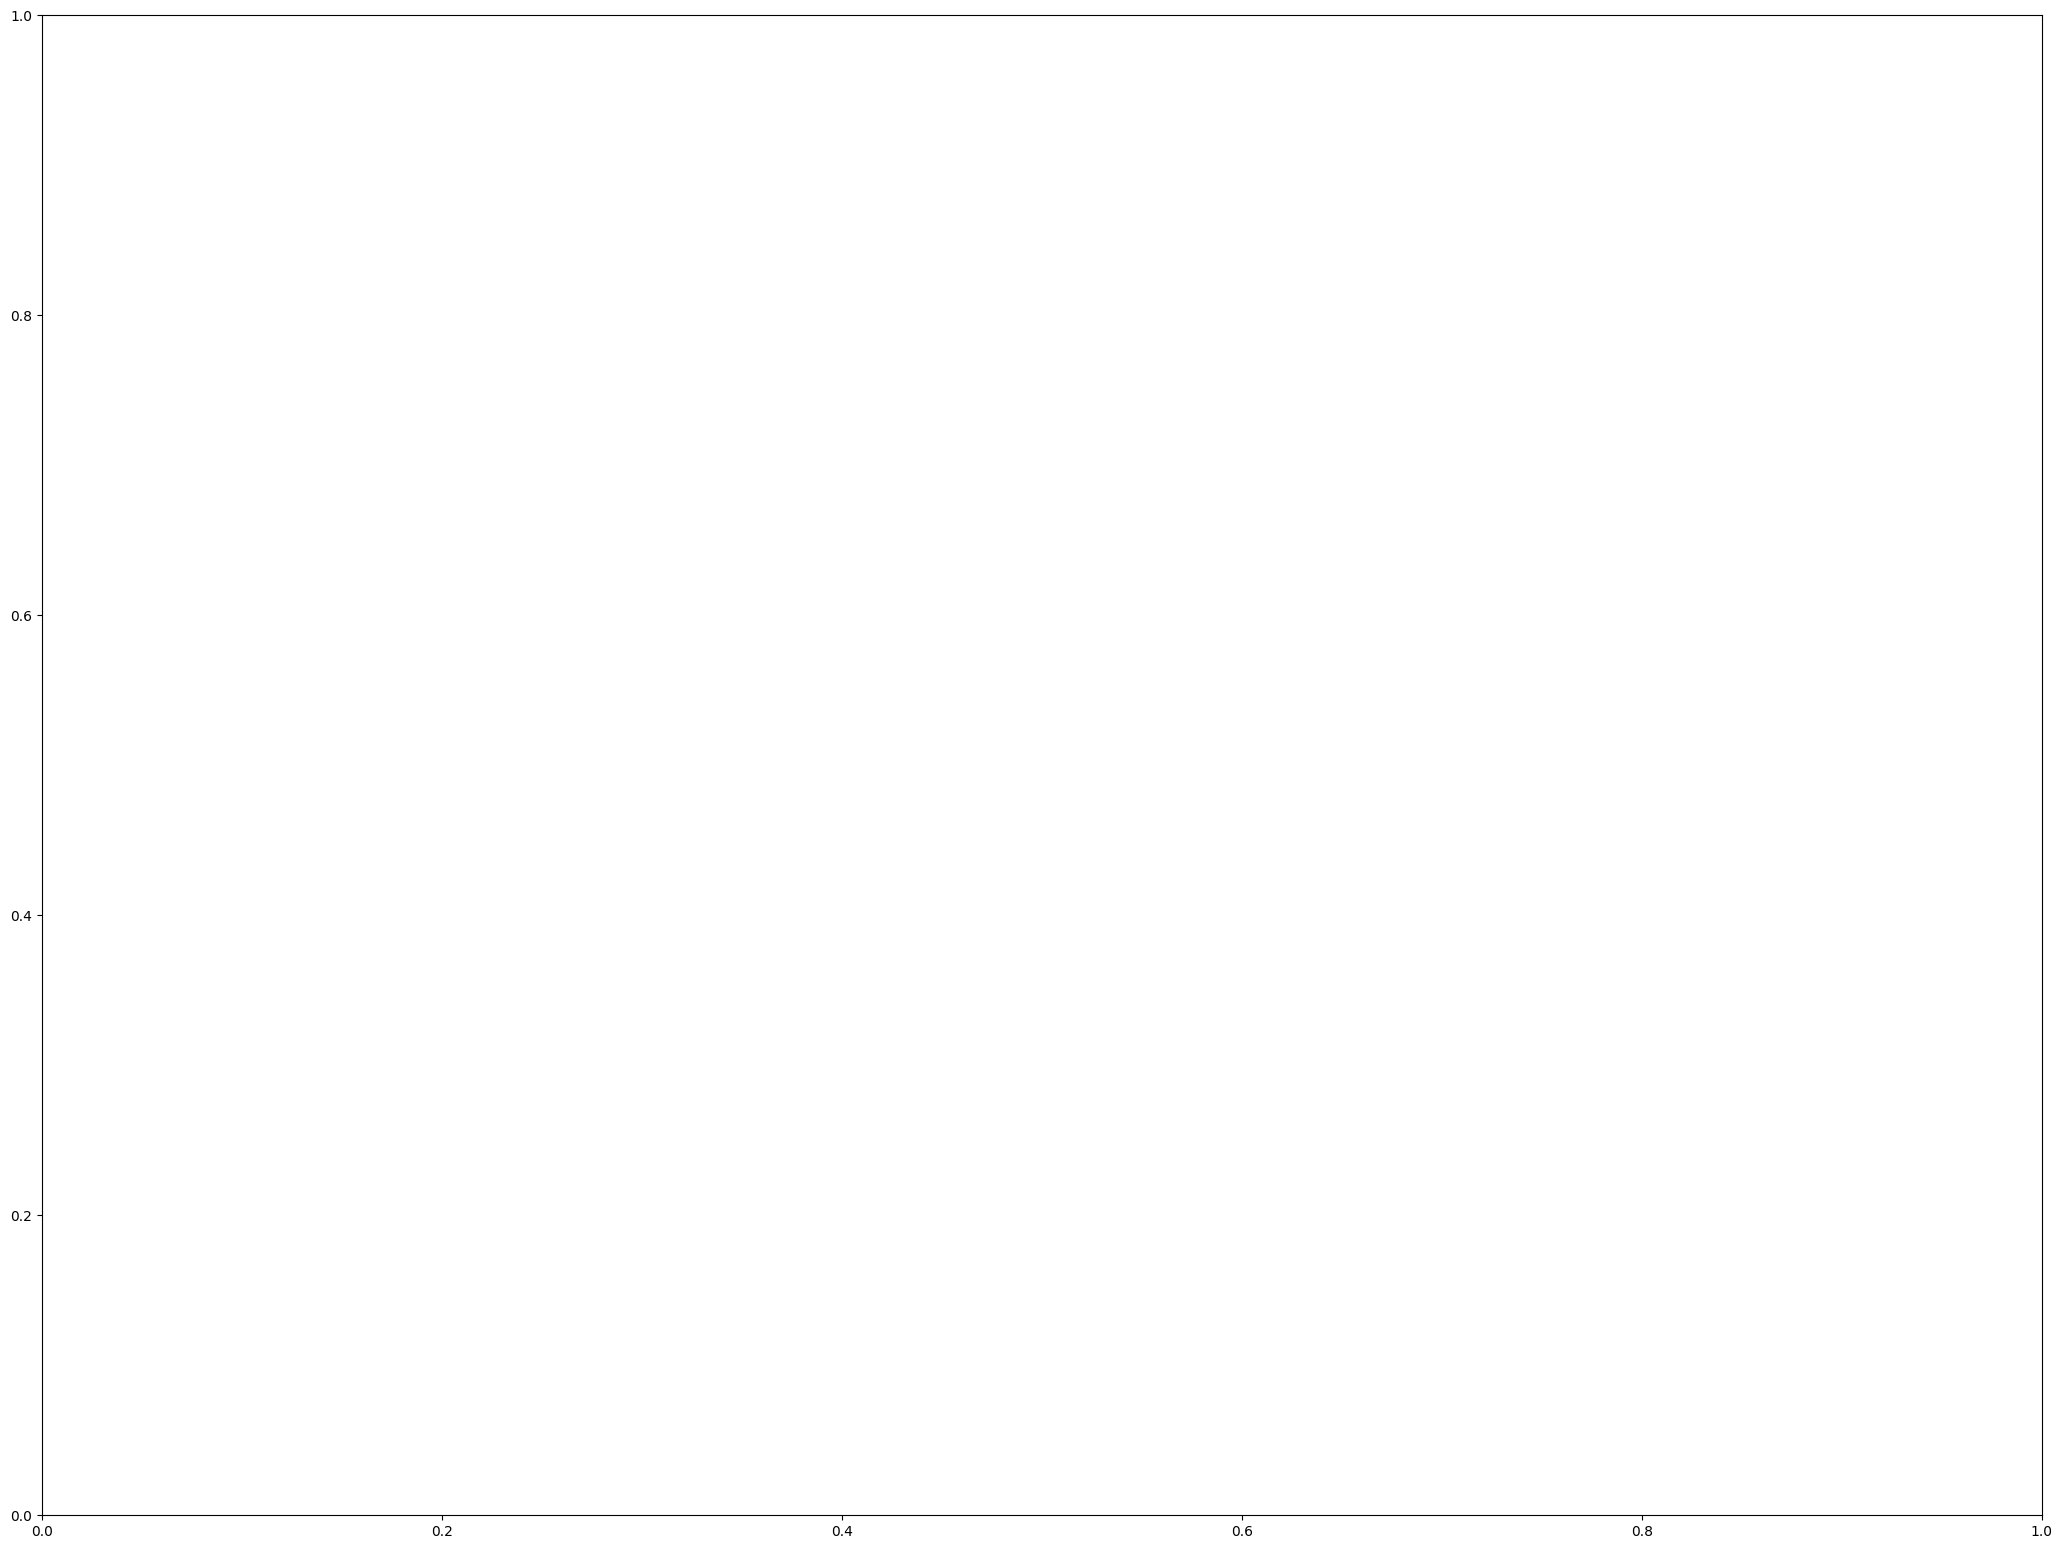

In [4]:
# Set up the plot
plt.figure(figsize=(20, 15))

# Define node colors based on type
node_colors = []
for node in G.nodes:
    if G.nodes[node]['type'] == 'Molecule':
        node_colors.append('lightblue')
    elif G.nodes[node]['type'] == 'Target':
        node_colors.append('lightgreen')
    elif G.nodes[node]['type'] == 'DeceaseCluster':
        node_colors.append('lightred')
    else:
        node_colors.append('lightcoral')

# Draw the graph
pos = nx.spring_layout(G, k=0.5, iterations=50)  # Adjust layout parameters for better spacing
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=2000, font_size=10, font_weight='bold', arrows=True)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Add title
plt.title("Knowledge Graph: Molecules, Targets, and Diseases", fontsize=16)

# Show the plot
plt.show()

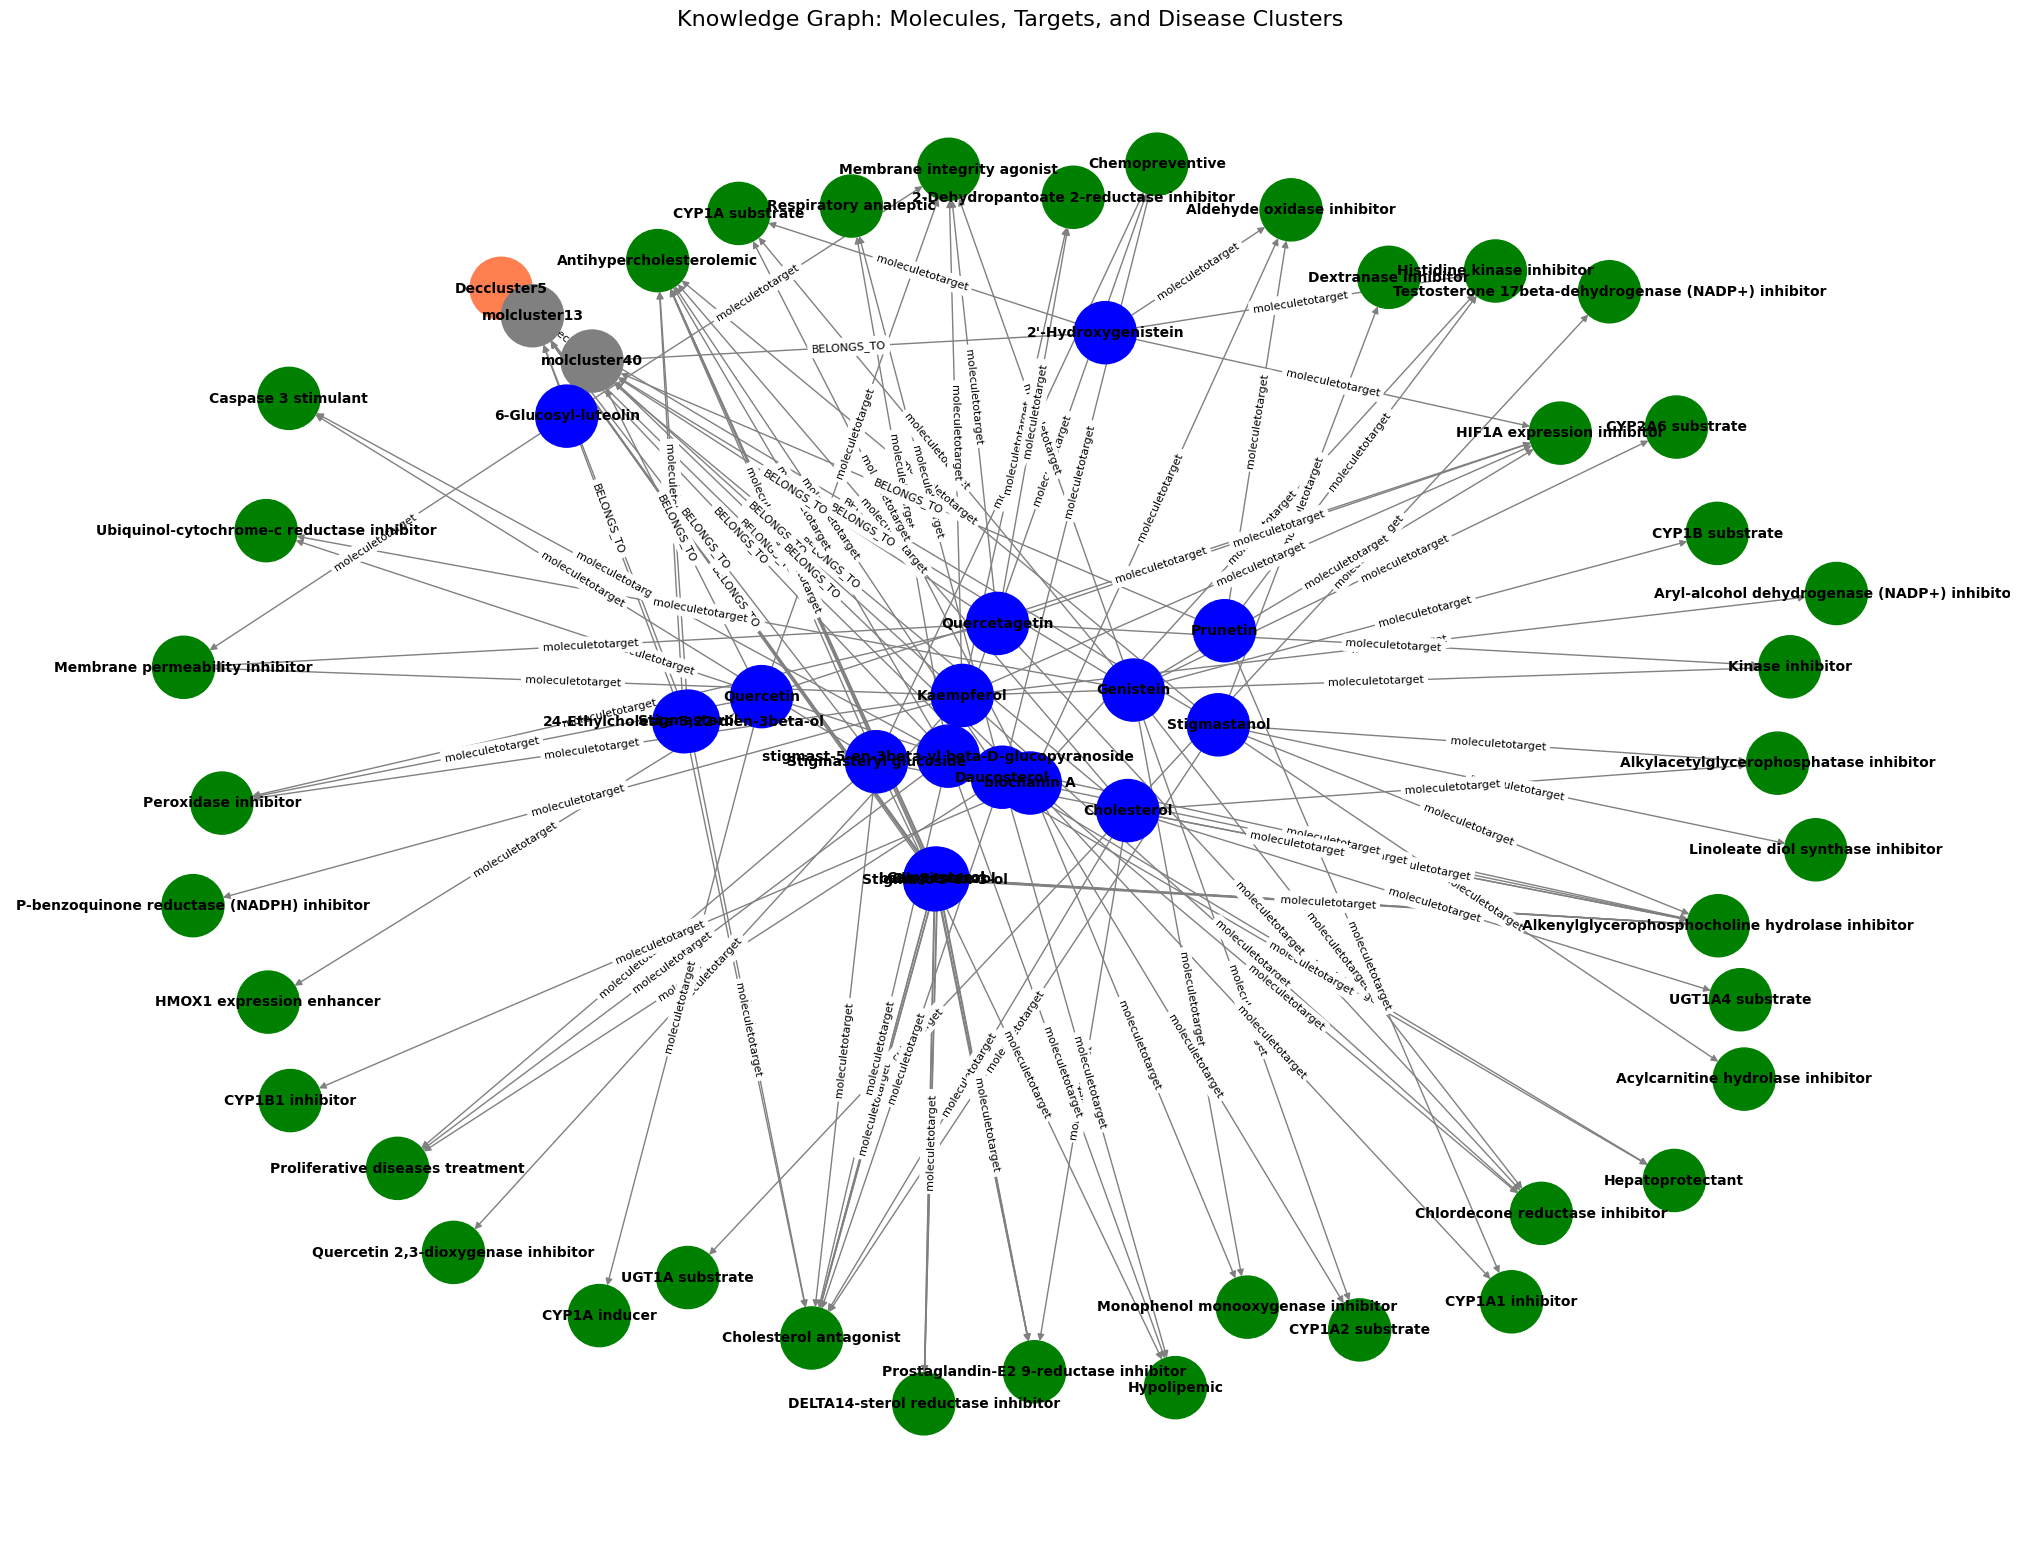

In [28]:
# Set up the plot
plt.figure(figsize=(20, 15))

# Define node colors based on type
node_colors = []
for node in G.nodes:
    node_type = G.nodes[node]['type']
    if node_type == 'Molecule':
        node_colors.append('blue')
    elif node_type == 'Target':
        node_colors.append('green')
    elif node_type == 'DeceaseCluster':
        node_colors.append('coral')  # ✅ use valid color here
    else:
        node_colors.append('gray')   # fallback for other types

# Draw the graph
pos = nx.spring_layout(G, k=0.1, iterations=50)
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=2000, font_size=10, font_weight='bold', arrows=True)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Add title
plt.title("Knowledge Graph: Molecules, Targets, and Disease Clusters", fontsize=16)

# Show the plot
plt.show()


In [6]:
# Save the graph as an image
plt.savefig("DC7_knowledge_graph.png", dpi=300, bbox_inches='tight')

# Download the image
from google.colab import files
files.download("DC7_knowledge_graph.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [7]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.0 MB/s eta 0:00:00


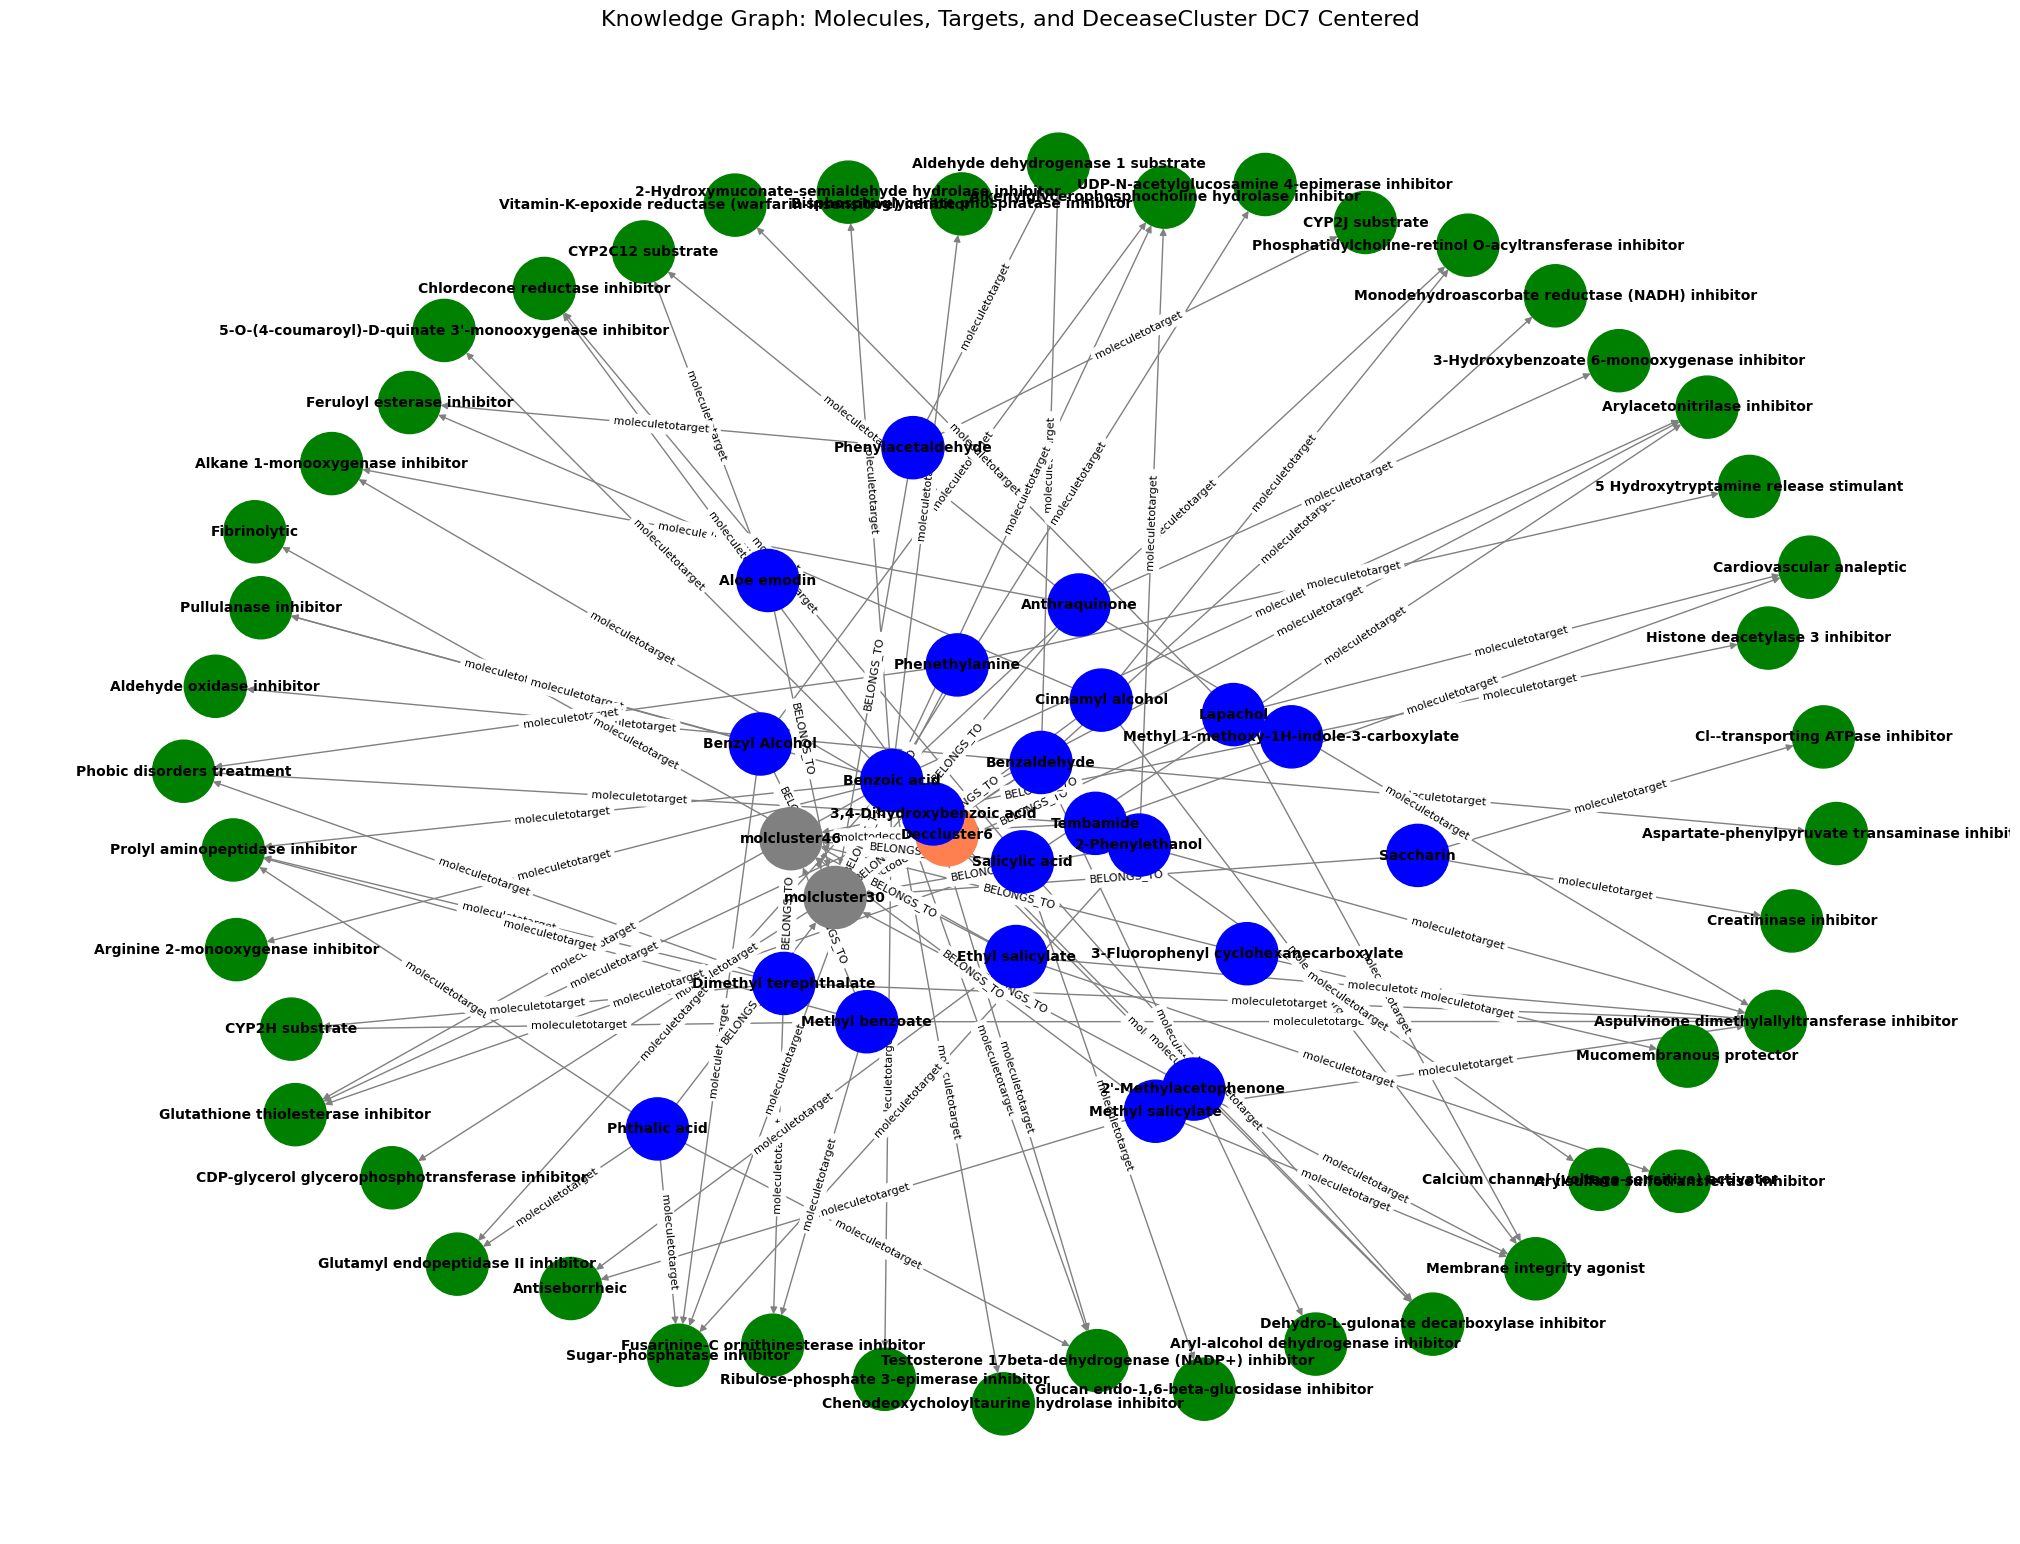

In [23]:
# Set up the plot
plt.figure(figsize=(20, 15))

# Step 1: Identify the node that represents DC7
dc7_node = None
for node in G.nodes:
    if G.nodes[node]['type'] == 'DeceaseCluster' and ('6' in node or 'DC6' in node):
        dc7_node = node
        break

if dc7_node is None:
    raise ValueError("DC7 node not found. Check your node names or type attributes.")

# Step 2: Generate spring layout with fixed position for DC7
# Give DC7 a fixed central position, and calculate others dynamically
fixed_positions = {dc7_node: (0, 0)}  # center
fixed_nodes = [dc7_node]

# Generate layout with DC7 fixed
pos = nx.spring_layout(G, k=0.5, iterations=100, pos=fixed_positions, fixed=fixed_nodes)

# Step 3: Define node colors based on type
node_colors = []
for node in G.nodes:
    node_type = G.nodes[node]['type']
    if node_type == 'Molecule':
        node_colors.append('blue')
    elif node_type == 'Target':
        node_colors.append('green')
    elif node_type == 'DeceaseCluster':
        node_colors.append('coral')
    else:
        node_colors.append('gray')

# Step 4: Draw the graph
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=2000, font_size=10, font_weight='bold', arrows=True)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Add title
plt.title("Knowledge Graph: Molecules, Targets, and DeceaseCluster DC7 Centered", fontsize=16)

# Show the plot
plt.show()


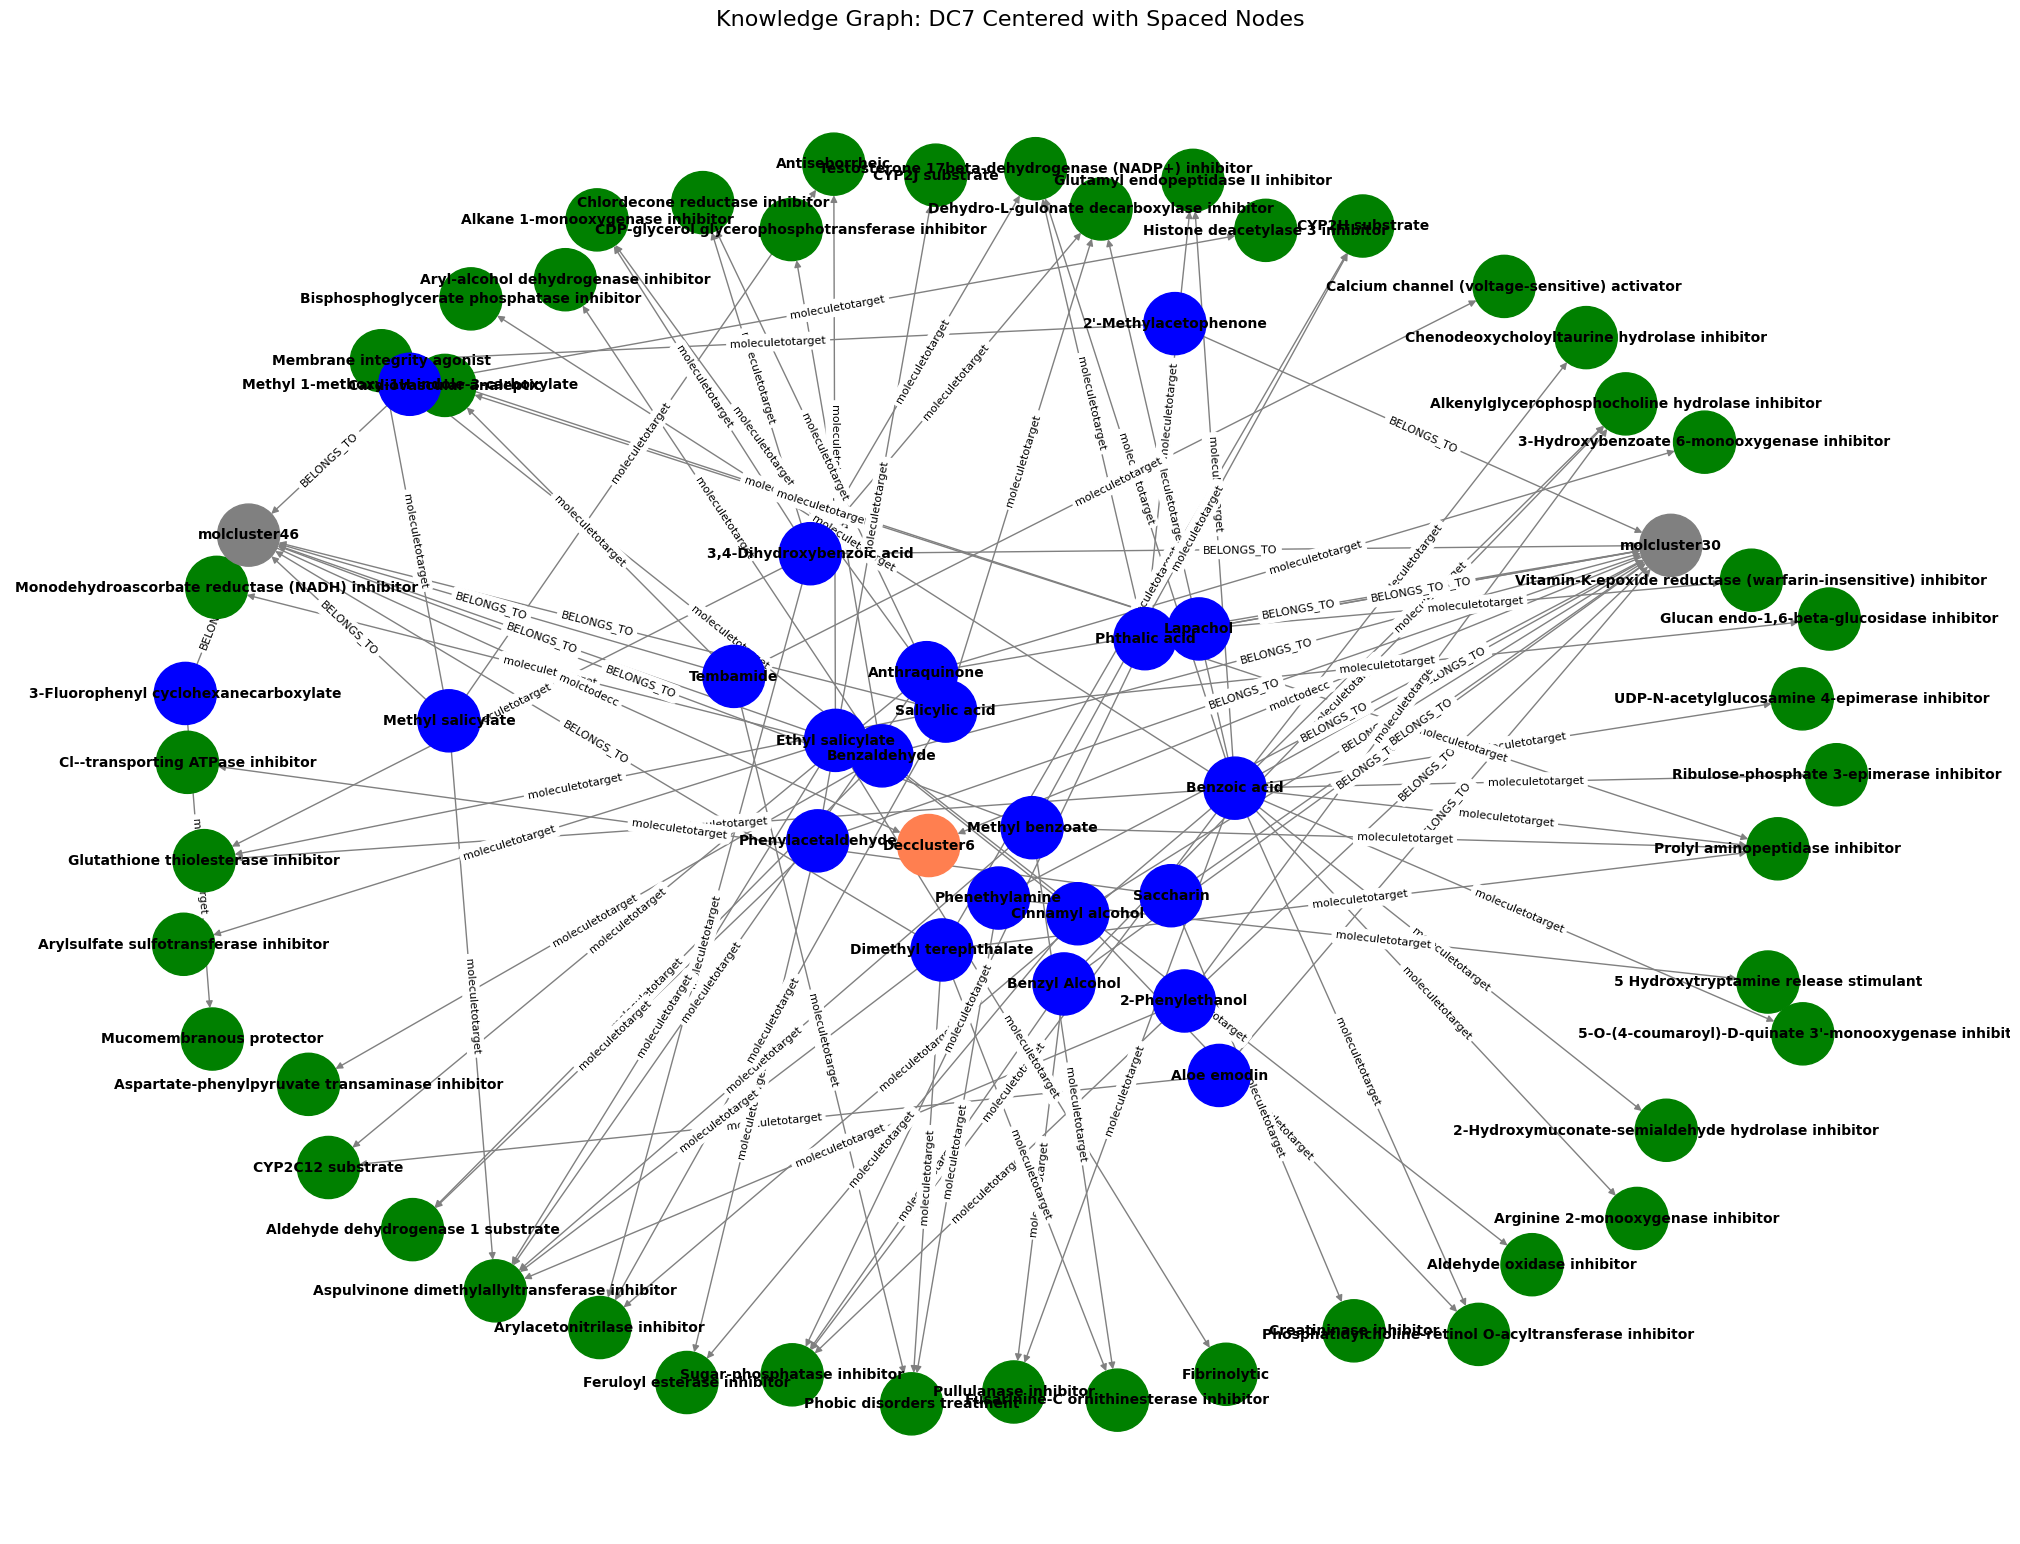

In [24]:
import matplotlib.pyplot as plt
import networkx as nx

# Set up the plot
plt.figure(figsize=(20, 15))

# Step 1: Identify the node representing DC7
dc7_node = None
for node in G.nodes:
    if G.nodes[node]['type'] == 'DeceaseCluster' and ('DC6' in node or '6' in node):
        dc7_node = node
        break

if dc7_node is None:
    raise ValueError("DC7 node not found. Please check node names or types.")

# Step 2: Assign a fixed position to DC7 in the center
fixed_positions = {dc7_node: (0, 0)}  # (x, y) center
fixed_nodes = [dc7_node]

# Step 3: Generate layout with high spacing (k controls distance)
pos = nx.spring_layout(
    G,
    k=1.5,                # ⬅️ Larger distance between nodes
    iterations=100,
    pos=fixed_positions,  # Fixed center for DC7
    fixed=fixed_nodes,
    scale=3               # ⬅️ Controls how spread out the graph is
)

# Step 4: Define node colors by type
node_colors = []
for node in G.nodes:
    node_type = G.nodes[node]['type']
    if node_type == 'Molecule':
        node_colors.append('blue')
    elif node_type == 'Target':
        node_colors.append('green')
    elif node_type == 'DeceaseCluster':
        node_colors.append('coral')  # DC7 or other clusters
    else:
        node_colors.append('gray')

# Step 5: Draw the graph
nx.draw(
    G, pos,
    with_labels=True,
    node_color=node_colors,
    edge_color='gray',
    node_size=2000,
    font_size=10,
    font_weight='bold',
    arrows=True
)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Add title
plt.title("Knowledge Graph: DC7 Centered with Spaced Nodes", fontsize=16)

# Show plot
plt.show()


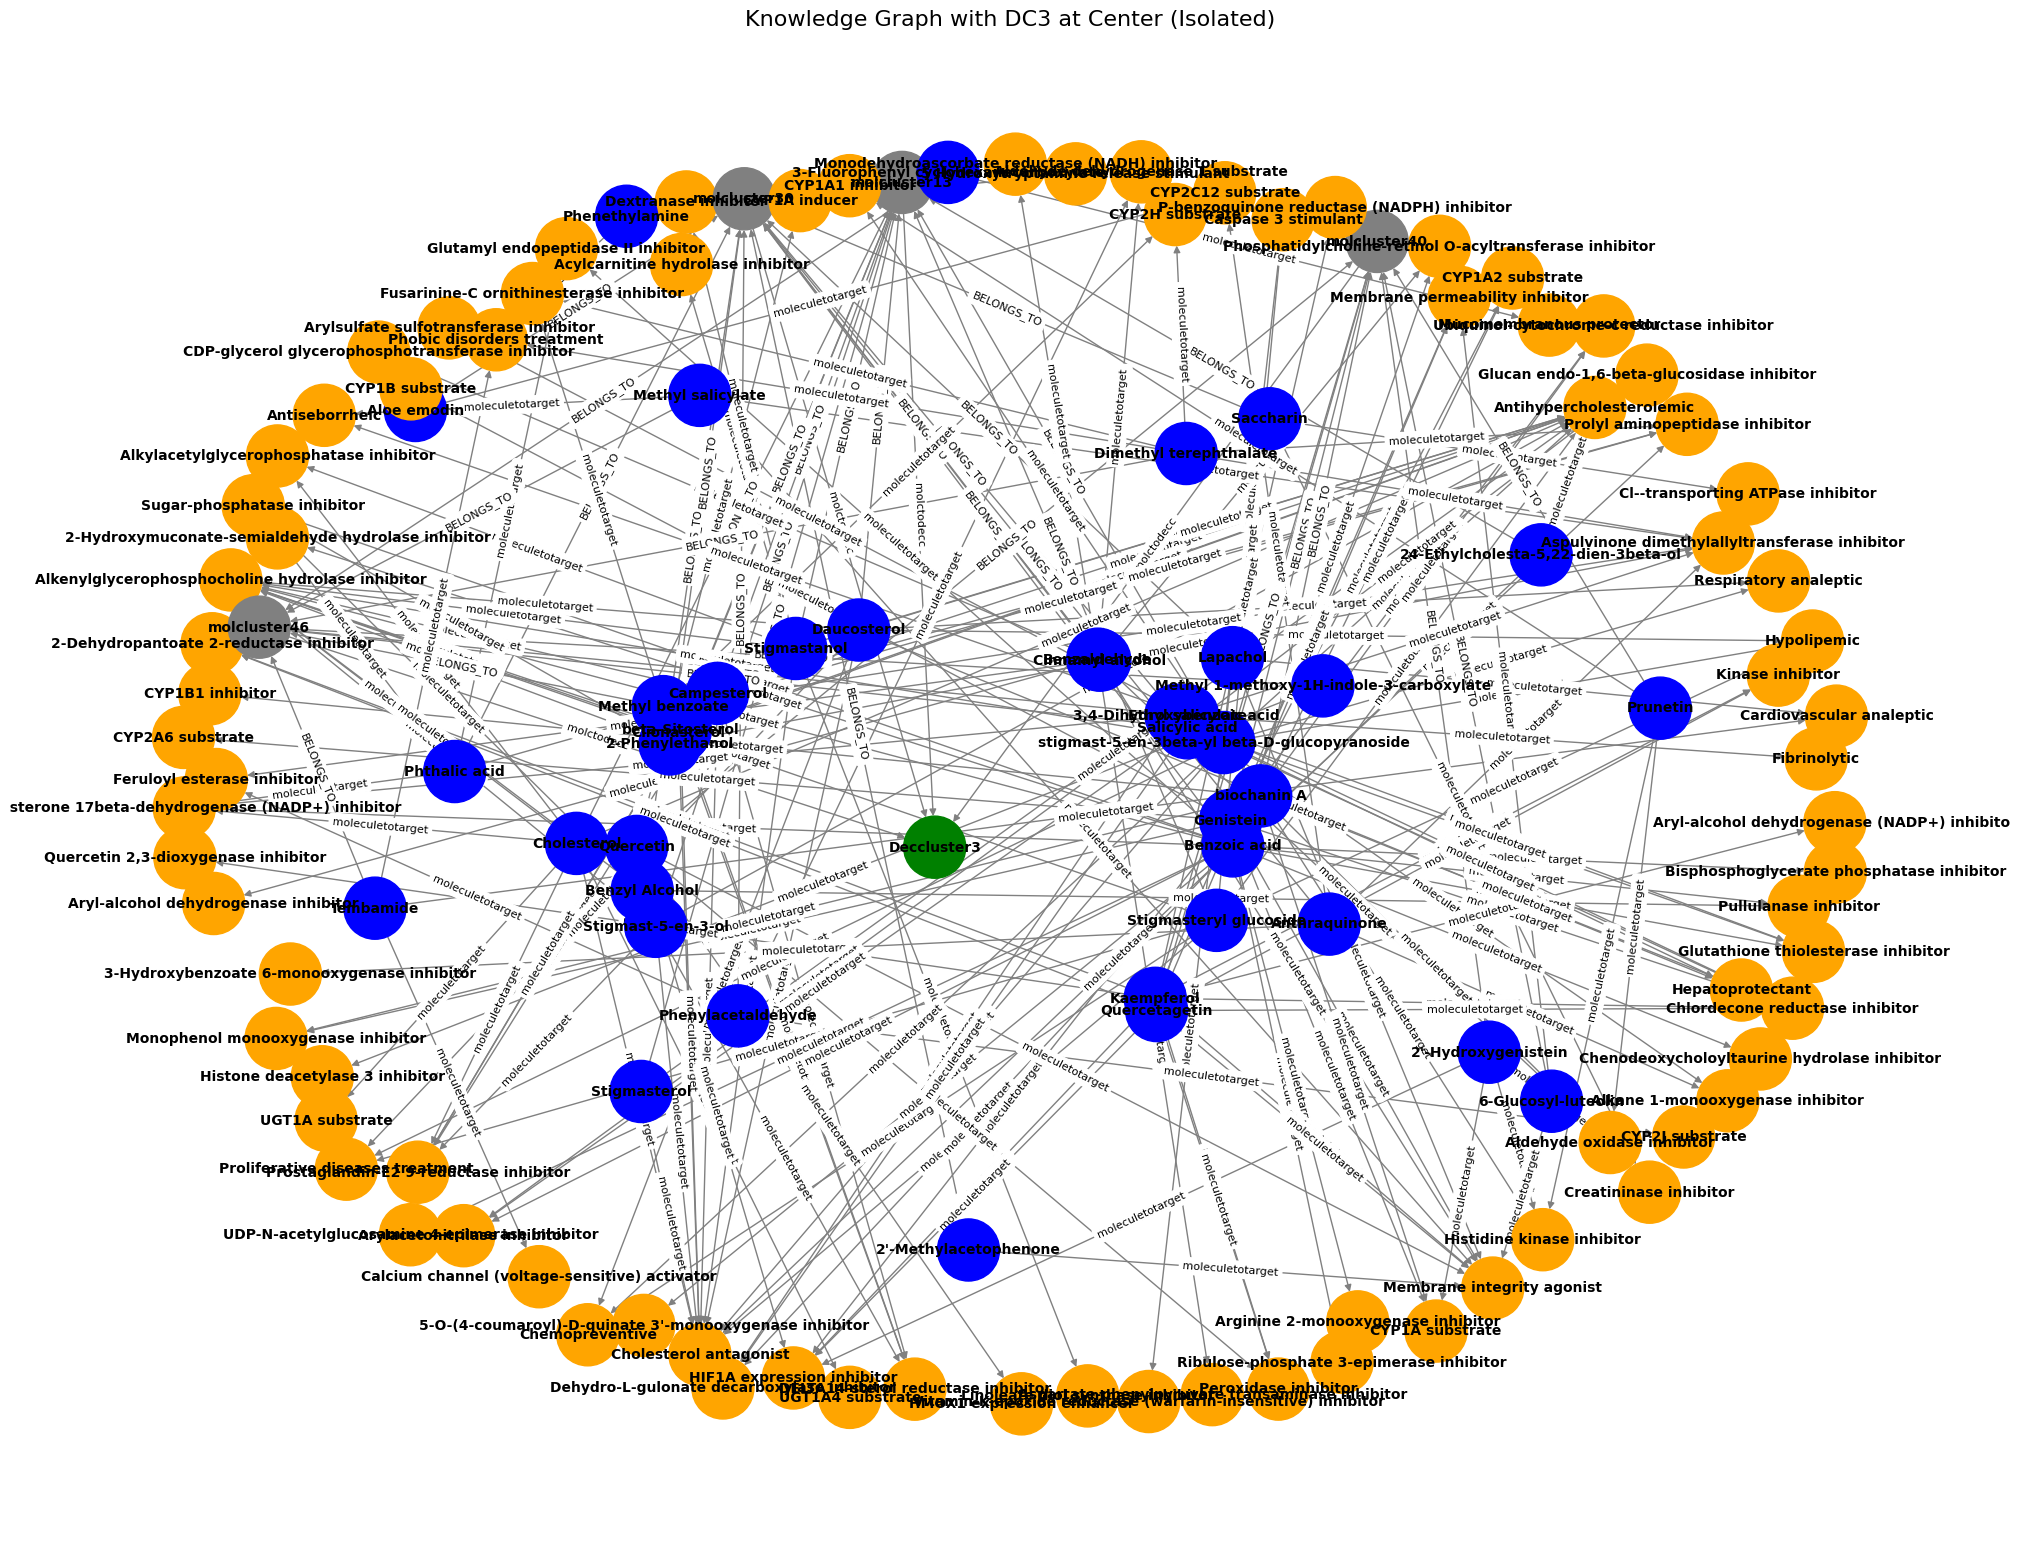

In [35]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Step 1: Identify DC7
dc7_node = None
for node in G.nodes:
    if G.nodes[node]['type'] == 'DeceaseCluster' and ('DC3' in node or '3' in node):
        dc7_node = node
        break

if dc7_node is None:
    raise ValueError("DC7 node not found.")

# Step 2: Set fixed position for DC7 at center
center_pos = np.array([0.0, 0.0])
fixed_positions = {dc7_node: center_pos}
fixed_nodes = [dc7_node]

# Step 3: Initial layout
pos = nx.spring_layout(
    G,
    k=1.8,              # Encourage greater spacing
    iterations=100,
    pos=fixed_positions,
    fixed=fixed_nodes,
    scale=5.0
)

# Step 4: Push other nodes away from DC7 if they're too close
def push_away(pos, center, min_distance=1.5):
    for node, p in pos.items():
        if node == dc7_node:
            continue
        vec = np.array(p) - center
        dist = np.linalg.norm(vec)
        if dist < min_distance:
            if dist == 0:
                vec = np.random.rand(2) - 0.5
                dist = 1e-4
            vec = vec / dist  # normalize
            pos[node] = center + vec * min_distance
    return pos

pos = push_away(pos, center_pos, min_distance=2.0)

# Step 5: Define node colors
node_colors = []
for node in G.nodes:
    node_type = G.nodes[node]['type']
    if node_type == 'Molecule':
        node_colors.append('blue')
    elif node_type == 'Target':
        node_colors.append('orange')
    elif node_type == 'DeceaseCluster':
        node_colors.append('green')
    else:
        node_colors.append('gray')

# Step 6: Draw
plt.figure(figsize=(20, 15))
nx.draw(G, pos, with_labels=True, node_color=node_colors,
        edge_color='gray', node_size=2000, font_size=10,
        font_weight='bold', arrows=True)

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Knowledge Graph with DC3 at Center (Isolated)", fontsize=16)
plt.show()


In [36]:
!pip install pyvis

from pyvis.network import Network
from google.colab import files

# Create an interactive 3D graph
net = Network(height="800px", width="100%", notebook=True, directed=True)

# Add nodes with colors and tooltips
for node in G.nodes:
    node_type = G.nodes[node]['type']
    if node_type == 'Molecule':
        net.add_node(node, color='#FF9999', title=f"Molecule: {node}")
    elif node_type == 'Target':
        net.add_node(node, color='#99FF99', title=f"Target: {node}")
    elif node_type == 'DeceaseCluster':
        net.add_node(node, color='#FFA500', title=f"Decease Cluster: {node}")
    else:
        net.add_node(node, color='#9999FF', title=f"Other: {node}")

# Add edges with labels as hover titles
for u, v in G.edges:
    net.add_edge(u, v, title=G.edges[u, v]['label'])

# Enable physics and control panel
net.show_buttons(filter_=['physics'])
net.toggle_physics(True)

# Save and display
net.show("knowledge_graph_3d.html")
files.download("knowledge_graph_3d.html")


knowledge_graph_3d.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>